In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from model_utility import *
from model_loader import *
from model_layer import *
from model_loss import *
from model_test import *
from model_save import *

device = "cuda:0"
weight = "official_kitti.ckpt"

mono_loader, scene_loader = load_loader("/SSD/kitti", False, "full")
model = load_model(device, weight)
augment_resize = AugmentResize([256, 832])
depth_eval     = MonoDepthEvaluation()
scene_eval     = MonoSceneFlowEvaluation()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2022-02-15 12:04:46,790 - pwc_network - Initializing MSRA


>>> Sceneflow dataset image length is 200
>>> Sceneflow dataset flow length  is 200
>>> Sceneflow dataset disp length  is 200
>>> Sceneflow dataset Loaded intrinsic matrix!


# Depth Metric 측정

In [2]:
image, depth = eval_depth(model, mono_loader, device)

100%|██████████| 697/697 [01:23<00:00,  8.34it/s]

Mono Depth Metric
abs_rel  0.103   sqrt_rel  0.851   rmse  4.574   rmse_log  0.195   a1  0.877   a2  0.953   a3  0.978    


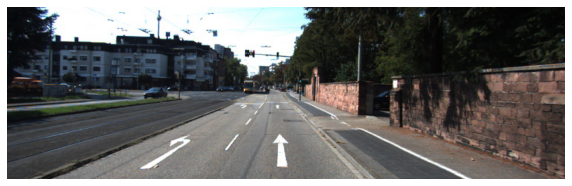

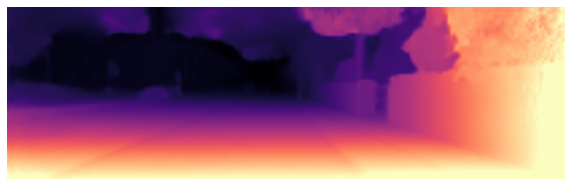

In [3]:
Visualization().show_image(image[0])
Visualization().show_image(depth[0][0])

# Scene Metric 측정

In [4]:
image, flow, disp = eval_scene(model, scene_loader, "kitti_flow_test1", "kitti_disp1_test2", "kitti_disp2_test3", device, True)

created save folder ./model_save/kitti_flow_test1
created save folder ./model_save/kitti_disp1_test2
created save folder ./model_save/kitti_disp2_test3


100%|██████████| 200/200 [16:51<00:00,  5.06s/it]

d1 0.3123 f1 0.2302 d2 0.3475 sf 0.4673  


In [ ]:
for index in [1, 13, 22, 23, 28]:
    Visualization().show_image(flow[index].T.swapaxes(2, 1))